In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
elcerrito = pd.read_csv('./dataset/elcerrito150x100.csv')
elsobrante = pd.read_csv('./dataset/elsobrante150x100.csv')
hercules = pd.read_csv('./dataset/hercules150x100.csv')
pinole = pd.read_csv('./dataset/pinole150x100.csv')
sanpablo = pd.read_csv('./dataset/sanpablo150x100.csv')

In [3]:
cities = [elcerrito, elsobrante, hercules, pinole, sanpablo]
df = pd.concat(cities)
print(df.shape)

(1117, 45015)


In [4]:
X = df.iloc[:,14:45014]
y = df.iloc[:,45014]
X.shape, y.shape

((1117, 45000), (1117,))

In [5]:
# check data balance
# 1: like, 0: unlike
y.value_counts(normalize=True)

1    0.618621
0    0.381379
Name: label, dtype: float64

## Conv2D

In [6]:
num_obs = X.shape[0]
width = 100
height = 150

X_reshape = np.reshape(X.values, (num_obs, 100, 150, 3))
X_reshape = X_reshape.astype('float32')
X_reshape /= 255.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_reshape, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((781, 100, 150, 3), (336, 100, 150, 3), (781,), (336,))

In [39]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(width, height, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(width, height, 3)))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(width, height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(.25))

model.add(Dense(64, activation='relu'))  # a fully connected layer.

model.add(Dense(1, activation='sigmoid')) # the output layer

model.compile(optimizer = 'adam', 
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 148, 64)       1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 146, 32)       18464     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 94, 144, 16)       4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 72, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 54144)             0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 54144)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                3465280   
__________

In [45]:
datagen = ImageDataGenerator(rotation_range=0, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True)

datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    steps_per_epoch = 1,
                    validation_data=(X_test, y_test),
                    verbose = 2)

Epoch 1/100
 - 15s - loss: 1.7189 - acc: 0.5625 - val_loss: 1.5527 - val_acc: 0.5833
Epoch 2/100


KeyboardInterrupt: 

Train on 781 samples, validate on 336 samples
Epoch 1/15
 - 95s - loss: 1.1134 - acc: 0.5903 - val_loss: 0.6604 - val_acc: 0.6190
Epoch 2/15
 - 88s - loss: 0.6554 - acc: 0.6184 - val_loss: 0.6417 - val_acc: 0.6190
Epoch 3/15
 - 91s - loss: 0.6270 - acc: 0.6517 - val_loss: 0.6262 - val_acc: 0.6488
Epoch 4/15
 - 92s - loss: 0.5970 - acc: 0.6953 - val_loss: 0.6308 - val_acc: 0.6667
Epoch 5/15
 - 89s - loss: 0.6044 - acc: 0.6914 - val_loss: 0.6449 - val_acc: 0.6548
Epoch 6/15
 - 85s - loss: 0.5494 - acc: 0.7298 - val_loss: 0.6156 - val_acc: 0.6607
Epoch 7/15
 - 82s - loss: 0.5029 - acc: 0.7670 - val_loss: 0.7230 - val_acc: 0.6577
Epoch 8/15
 - 84s - loss: 0.4503 - acc: 0.8028 - val_loss: 0.6658 - val_acc: 0.6339
Epoch 9/15
 - 82s - loss: 0.3642 - acc: 0.8284 - val_loss: 0.7162 - val_acc: 0.6131
Epoch 10/15
 - 79s - loss: 0.2661 - acc: 0.8976 - val_loss: 0.8885 - val_acc: 0.6310
Epoch 11/15
 - 80s - loss: 0.1877 - acc: 0.9385 - val_loss: 1.0433 - val_acc: 0.6161
Epoch 12/15
 - 83s - loss: 0

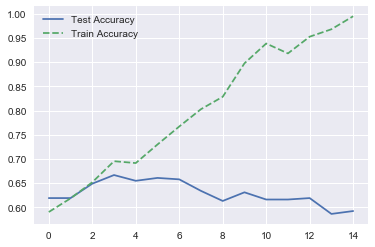

In [40]:
results = model.fit(X_train,
                    y_train, 
                    batch_size = 32, 
                    epochs = 15,
                    validation_data=(X_test, y_test),
                    verbose = 2)

plt.plot(results.history['val_acc'], label = 'Test Accuracy')
plt.plot(results.history['acc'], label = 'Train Accuracy', ls = '--')
plt.legend();

In [41]:
preds = model.predict(X_test)

In [44]:
confusion_matrix(y_test,preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [43]:
y_test.value_counts()

1    208
0    128
Name: label, dtype: int64